In [5]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

In [7]:
digits = load_digits()

X = digits.data
y = digits.target

#### Task 1

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)

In [16]:
def write_answer(ans, i):
    with open('ans' + str(i) + '.txt', 'w') as f:
        f.write(str(ans))

In [17]:
write_answer(scores.mean(), 1)

#### Task 2

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
bag_clf = BaggingClassifier(clf, n_estimators=100)

scores2 = cross_val_score(bag_clf, X, y, cv=10)

In [21]:
write_answer(scores2.mean(), 2)

#### Task 3

In [23]:
bag_clf_sqrt = BaggingClassifier(clf, n_estimators=100, max_features=int(X.shape[1]**0.5))

scores3 = cross_val_score(bag_clf_sqrt, X, y, cv=10)

In [25]:
write_answer(scores3.mean(), 3)

#### Task 4

In [69]:
clf = DecisionTreeClassifier(max_features=int(X.shape[1]**0.5))

bag_clf = BaggingClassifier(clf, n_estimators=100)

scores4 = cross_val_score(bag_clf, X, y, cv=10)

scores4.mean()

0.9493513345747981

In [65]:
for i in range(10):
    scores4 = cross_val_score(bag_clf, X, y, cv=10)
    print(scores4.mean())

0.9337895716945998
0.9237430167597764
0.9248944754810676
0.9254345127250154
0.9187647423960271
0.9282091868404716
0.9270887647423962
0.9321073867163253
0.9215518311607698
0.934326505276226


In [64]:
write_answer(scores4.mean(), 4)

In [70]:
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=8),
                  n_estimators=100)

In [71]:
bag_clf.estimators_

[DecisionTreeClassifier(max_features=8, random_state=1540288106),
 DecisionTreeClassifier(max_features=8, random_state=543034529),
 DecisionTreeClassifier(max_features=8, random_state=437684124),
 DecisionTreeClassifier(max_features=8, random_state=1534269714),
 DecisionTreeClassifier(max_features=8, random_state=984716399),
 DecisionTreeClassifier(max_features=8, random_state=1985398253),
 DecisionTreeClassifier(max_features=8, random_state=75210029),
 DecisionTreeClassifier(max_features=8, random_state=577028124),
 DecisionTreeClassifier(max_features=8, random_state=424522005),
 DecisionTreeClassifier(max_features=8, random_state=1111227674),
 DecisionTreeClassifier(max_features=8, random_state=98688512),
 DecisionTreeClassifier(max_features=8, random_state=975169024),
 DecisionTreeClassifier(max_features=8, random_state=2034126589),
 DecisionTreeClassifier(max_features=8, random_state=1009323772),
 DecisionTreeClassifier(max_features=8, random_state=2041450565),
 DecisionTreeClassif

#### Task 5

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
import matplotlib.pyplot as plt

In [43]:
def get_dependency_and_plot(parameters, param_title=None):
    # parameters: tuple, где первый элемент - название параметра RandomForestClassifier, (например, n_estimators),
    # а второй - диапазон для заданного параметра.
    #
    # param_title: Продолжение фразы 'Зависимость accuracy от ...' из заголовка графика.
    # Опциональный параметр. Если None, то заголовок не оторбражается

    param_name, param_range = parameters
    
    accuracy_list = []
    # цикл по диапазону параметра:
    for value in param_range:
        # словарь параметров для задания параметров модели через метод set_params()
        param_dict = {param_name: value}
        
        model = RandomForestClassifier()
        model.set_params(**param_dict)
        
        # считаем accuracy на кросс-валидации и берём среднее:
        score = cross_val_score(model, X, y, cv=10, n_jobs=-1).mean()
        accuracy_list.append((value, score))
    
    # отрисовываем график:
    xx = [z[0] for z in accuracy_list]
    yy = [z[1] for z in accuracy_list]
    plt.plot(xx, yy, '.-')
    
    if param_title != None:
        plt.title('Зависимость accuracy от ' + param_title)
    plt.xlabel(param_name)
    plt.ylabel("Mean accuracy")

In [44]:
n_estimators_range = np.arange(1, 200, 10, dtype=int)
max_features_range = np.arange(5, X.shape[1], 5, dtype=int)
max_depth_range = np.arange(3, 30, 2, dtype=int)

# Также определим пары tuple для работы с определённой выше функцией:
est_tuple = ('n_estimators', n_estimators_range)
max_features_tuple = ('max_features', max_features_range)
max_depth_tuple = ('max_depth', max_depth_range)

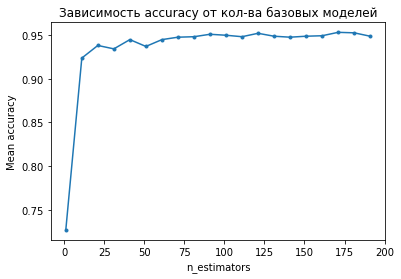

In [45]:
get_dependency_and_plot(est_tuple, 'кол-ва базовых моделей')

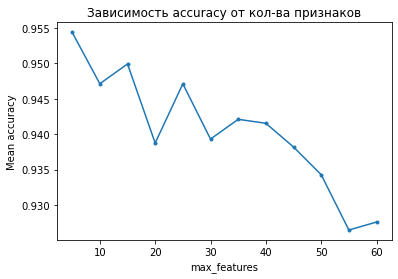

In [46]:
get_dependency_and_plot(max_features_tuple, 'кол-ва признаков')

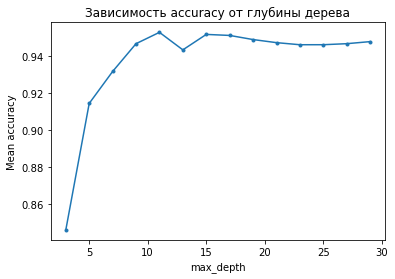

In [47]:
get_dependency_and_plot(max_depth_tuple, 'глубины дерева')

In [49]:
write_answer('2 3 4 7', 5)